# Census Data Analysis & Policy Recommendation

This notebook analyses a mock UK census dataset (2025) to identify demographic and socioeconomic trends and to support evidence-based local government decisions.

**Focus areas:** data cleaning, exploratory data analysis (EDA), visualisation, and practical recommendations.

**Tools:** Python, Pandas, NumPy, Matplotlib, Seaborn

## Project Objectives

- Clean and validate the census dataset (handle missing or inconsistent entries).
- Explore key demographics (age structure, gender, employment, household occupancy, marital status, religion, infirmities).
- Produce clear visualisations and summary tables.
- Provide a short, data-driven recommendation based on findings.

## Dataset Overview

The dataset contains individual-level census records including age, gender, relationship to head of household, marital status, occupation, religion, and infirmities.  
Some fields include missing values (e.g., NaNs for minors or non-responses), so cleaning is required before analysis.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("T1_A25census-6.csv")
df

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Albert Inlet,Lynda,Burke,38,Head,Single,Female,Mechanical engineer,NaN,Catholic
1,1,1,Albert Inlet,Jane,Burke,1,Daughter,NaN,Female,Child,NaN,NaN
2,2,1,Albert Inlet,Gerard,Roberts,31,Lodger,Divorced,Male,Training and development officer,NaN,Christian
3,3,2,Albert Inlet,Trevor,Newman,59,Head,Single,Male,Arts administrator,NaN,NaN
4,4,3,Albert Inlet,Guy,Armstrong,74,Head,Divorced,Male,Retired Patent attorney,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9382,9382,1,Cottingham Rectory,Elizabeth,Burns,18,Daughter,Single,Female,Student,NaN,Christian
9383,9383,1,Cottingham Rectory,Mary,Burns,14,Daughter,NaN,Female,Student,NaN,NaN
9384,9384,1,Cottingham Rectory,Susan,Burns,12,Daughter,NaN,Female,Student,NaN,NaN
9385,9385,1,Cottingham Rectory,Billy,Burns,12,Son,NaN,Male,Student,NaN,NaN


In [3]:
print(df.columns)

Index(['Unnamed: 0', 'House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')


In [4]:
df.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Albert Inlet,Lynda,Burke,38,Head,Single,Female,Mechanical engineer,NaN,Catholic
1,1,1,Albert Inlet,Jane,Burke,1,Daughter,NaN,Female,Child,NaN,NaN
2,2,1,Albert Inlet,Gerard,Roberts,31,Lodger,Divorced,Male,Training and development officer,NaN,Christian
3,3,2,Albert Inlet,Trevor,Newman,59,Head,Single,Male,Arts administrator,NaN,NaN
4,4,3,Albert Inlet,Guy,Armstrong,74,Head,Divorced,Male,Retired Patent attorney,NaN,NaN


In [5]:
#removes the cloumn "unnamed:0" which is unnecessary
df=df.drop(columns="Unnamed: 0")
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Albert Inlet,Lynda,Burke,38,Head,Single,Female,Mechanical engineer,NaN,Catholic
1,1,Albert Inlet,Jane,Burke,1,Daughter,NaN,Female,Child,NaN,NaN
2,1,Albert Inlet,Gerard,Roberts,31,Lodger,Divorced,Male,Training and development officer,NaN,Christian
3,2,Albert Inlet,Trevor,Newman,59,Head,Single,Male,Arts administrator,NaN,NaN
4,3,Albert Inlet,Guy,Armstrong,74,Head,Divorced,Male,Retired Patent attorney,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9387 entries, 0 to 9386
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9387 non-null   int64 
 1   Street                         9387 non-null   object
 2   First Name                     9387 non-null   object
 3   Surname                        9387 non-null   object
 4   Age                            9387 non-null   object
 5   Relationship to Head of House  8784 non-null   object
 6   Marital Status                 7165 non-null   object
 7   Gender                         9387 non-null   object
 8   Occupation                     9387 non-null   object
 9   Infirmity                      70 non-null     object
 10  Religion                       3927 non-null   object
dtypes: int64(1), object(10)
memory usage: 806.8+ KB


In [7]:
# Finding out how many null values are there in the data
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     603
Marital Status                   2222
Gender                              0
Occupation                          0
Infirmity                        9317
Religion                         5460
dtype: int64

In [8]:
# Finding the unique values
                
# House number 

print(f"House Number : {df["House Number"].unique()}")
df["House Number"].isnull().values.any()

House Number : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232]


np.False_

In [9]:
#creating new column - Household 

df["Household"]=df["House Number"].astype(str)+" "+df["Street"]

## Data Cleaning

This section addresses missing values and inconsistent formats to make the dataset suitable for analysis.

### Cleaning: Age
- Convert non-numeric entries (e.g., words) into numeric values where applicable.
- Ensure the column is numeric and handle missing/invalid ages consistently.

In [10]:
# cleaing age column
# checking the unique values
df["Age"].unique()

array(['38', '1', '31', '59', '74', '98', '51', '37', '36', '79', '33',
       '10', '39', '40', '3', '76', '58', '55', '21', '17', '14', '71',
       '35', '5', '4', '2', '16', '73', '27', '44', '0', '49', '25', '48',
       '50', '9', '61', '63', '18', '19', '64', '67', '53', '15', '30',
       '12', '45', '11', '32', '7', '56', '78', '43', '26', '47', '70',
       '34', '75', '77', '46', '13', '54', '81', '85', '28', '69', '41',
       '57', '22', '29', '20', '65', '72', '60', '68', '84', '6', '62',
       '23', '52', '42', '8', '24', '88', '97', '82', '83', '66', '80',
       '86', '89', '87', '105', '90', '102', '104', '95', '100', '93',
       '94', '91', '99', '96', '106', 'one', '57.7720148', '59.7720148',
       '56.90834691', '51.90834691'], dtype=object)

In [11]:
# converting the word - one into number:
df.loc[df["Age"].astype(str).str.lower()=="one","Age"]=1

# converting every values to numberic:
df["Age"]=pd.to_numeric(df["Age"],errors="coerce")

# Rounding up the dicimals into whole numbers:
df["Age"]=df["Age"].round().astype("int64")

# checking the results:
df["Age"].unique()

array([ 38,   1,  31,  59,  74,  98,  51,  37,  36,  79,  33,  10,  39,
        40,   3,  76,  58,  55,  21,  17,  14,  71,  35,   5,   4,   2,
        16,  73,  27,  44,   0,  49,  25,  48,  50,   9,  61,  63,  18,
        19,  64,  67,  53,  15,  30,  12,  45,  11,  32,   7,  56,  78,
        43,  26,  47,  70,  34,  75,  77,  46,  13,  54,  81,  85,  28,
        69,  41,  57,  22,  29,  20,  65,  72,  60,  68,  84,   6,  62,
        23,  52,  42,   8,  24,  88,  97,  82,  83,  66,  80,  86,  89,
        87, 105,  90, 102, 104,  95, 100,  93,  94,  91,  99,  96, 106])

### Cleaning: Gender
- Standardise gender labels (e.g., casing/typos).
- Treat missing values as `Unknown` to retain records for analysis.

In [12]:
df["Gender"].unique()

array(['Female', 'Male', 'female', 'm', 'f', 'M', 'F', 'male', ' '],
      dtype=object)

In [13]:
# Making all lowercase to campare easily:
df["Gender"]=df["Gender"].astype(str).str.strip().str.lower()

# Replacing inproper values: 
df["Gender"]=df["Gender"].replace({
    "m":"Male",
    "male":"Male",
    "f":"Female",
    "female":"Female",
    "":"Unknow"})

df["Gender"].unique()

array(['Female', 'Male', 'Unknow'], dtype=object)

### Cleaning: Marital Status
- For minors, marital status may be missing or recorded as N/A.
- Standardise missing/invalid values to `Unknown` for consistency.

In [14]:
df["Marital Status"].unique()

array(['Single', nan, 'Divorced', 'Widowed', 'Married', 'S', 'W', 'D',
       ' ', 'M'], dtype=object)

In [15]:
# striping the spaces
df["Marital Status"]=df["Marital Status"].astype(str).str.strip()

# replace with abbreviations and invaild strings 
df["Marital Status"]=df["Marital Status"].replace({
    "S":"Single",
    "W":"Widowed",
    "D":"Divorced",
    "M":"Married",
    "nan":np.nan,
    "":np.nan})

# Filling missing values with 'unkown'
df["Marital Status"] = df["Marital Status"].fillna("Unknown")

df["Marital Status"].unique()

array(['Single', 'Unknown', 'Divorced', 'Widowed', 'Married'],
      dtype=object)

### Cleaning Religion 

In [16]:
df["Religion"].unique()

array(['Catholic', nan, 'Christian', 'Methodist', 'Muslim', 'Sikh',
       'Quaker', 'Jewish', ' ', 'Private', 'Buddist', 'Nope',
       'Housekeeper'], dtype=object)

In [17]:
# Striping spaces
df["Religion"]=df["Religion"].astype(str).str.strip()

# Fixing the seplling 
df["Religion"]=df["Religion"].replace({
    "Buddist":"Buddhist",
    "Nope":np.nan,
    "nan":np.nan,
    "Housekeeper":np.nan,
    "":np.nan})

# using function to fill missing 'Religion' based on household
def fill_missing_religion(row, grouped_data):

    if pd.isna(row["Religion"]):

        # Grouping all person in the same household
        house_group = grouped_data.get_group(row["Household"])

        # Getting unique non missing religions
        religions = house_group["Religion"].dropna().unique()

        # If everyone in the household shares the same religion fill with it
        if len(religions) == 1:
            return religions[0]

        # If the household has mixed religions mark as Unknown
        else:
            return "Unknown"

    # If religion is not missing, return it unchanged
    return row["Religion"]


# Group by the new Household column
grouped_data = df.groupby("Household")

# Apply the function to each row
df["Religion"] = df.apply(lambda row: fill_missing_religion(row, grouped_data), axis=1)


df["Religion"].unique()

array(['Catholic', 'Unknown', 'Christian', 'Methodist', 'Muslim', 'Sikh',
       'Quaker', 'Jewish', 'Private', 'Buddhist'], dtype=object)

### Cleaning: Relationship to Head of Household
- Standardise relationship labels (e.g., `Head`, `Wife`, `Husband`, `Son`, `Daughter`, etc.).
- Handle missing/invalid values as `Unknown`.

In [18]:
df["Relationship to Head of House"].unique()

array(['Head', 'Daughter', 'Lodger', 'Husband', 'Son', 'Wife', 'Partner',
       'Step-Daughter', 'Adopted Daughter', nan, 'Cousin', 'Adopted Son',
       'Granddaughter', 'Sibling', 'Step-Son', 'Neice', 'Nephew',
       'Grandson', 'Visitor', ' ', 'Adopted Grandson', 'Son-in-law'],
      dtype=object)

In [19]:
df["Relationship to Head of House"]=df["Relationship to Head of House"].astype(str).str.strip()

df["Relationship to Head of House"]=df["Relationship to Head of House"].replace(
    ["","nan"," "],np.nan)

#looping through each household 
for houses in df["Household"].unique():
    family=df[df["Household"]==houses]
    if "Head" in family["Relationship to Head of House"].values:
        continue
    old_age=family["Age"].max()

    #filling head to the old person if the values are missing
    df.loc[(df["Household"]==houses)&
        (df["Age"]==old_age)&
        
        (df["Relationship to Head of House"].isna()),"Relationship to Head of House"]="Head"

df["Relationship to Head of House"]=df["Relationship to Head of House"].fillna("Unknown")

df["Relationship to Head of House"].unique()
    

array(['Head', 'Daughter', 'Lodger', 'Husband', 'Son', 'Wife', 'Partner',
       'Step-Daughter', 'Adopted Daughter', 'Unknown', 'Cousin',
       'Adopted Son', 'Granddaughter', 'Sibling', 'Step-Son', 'Neice',
       'Nephew', 'Grandson', 'Visitor', 'Adopted Grandson', 'Son-in-law'],
      dtype=object)

### Cleaning: Infirmity
- Replace missing values with `None/Unknown` depending on interpretation.
- Keep the field consistent for counting and plotting.

In [20]:
df["Infirmity"].unique()

array([nan, 'Deaf', 'Physical Disability', 'Blind', ' ',
       'Mental Disability', 'Unknown Infection'], dtype=object)

In [21]:
df["Infirmity"]=df["Infirmity"].astype(str).str.strip()
df["Infirmity"]=df["Infirmity"].replace({
    "nan":np.nan,
    "":np.nan})
df["Infirmity"] = df["Infirmity"].fillna("Not Recorded")

In [22]:
df["Infirmity"].unique()

array(['Not Recorded', 'Deaf', 'Physical Disability', 'Blind',
       'Mental Disability', 'Unknown Infection'], dtype=object)

In [23]:
df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Household                        0
dtype: int64

## Feature Engineering

### Employment Status
Create a simplified employment status field derived from the occupation column to support analysis (e.g., Employed, Unemployed, Student, Retired).

In [24]:
#Creating new column for Employment Status
df["Occupation"] = df["Occupation"].astype(str).str.lower()

df["Employment Status"] = "Employed"  # default

# Unemployed
df.loc[df["Occupation"].str.contains("unemployed", na=False), "Employment Status"] = "Unemployed"

# Retired
df.loc[df["Occupation"].str.contains("retired", na=False), "Employment Status"] = "Retired"

# Children (under 16)
df.loc[df["Age"] < 16, "Employment Status"] = "Child"

# University students (16+ or 18+ depending on logic)
df.loc[
    (df["Occupation"].str.contains("student", na=False)) &
    (df["Age"] >= 18),
    "Employment Status"
] = "University Student"

# School students (under 18)
df.loc[
    (df["Occupation"].str.contains("student", na=False)) &
    (df["Age"] < 18),
    "Employment Status"
] = "Student"


df["Employment Status"].unique()


array(['Employed', 'Child', 'Retired', 'Student', 'University Student',
       'Unemployed'], dtype=object)

## Exploratory Data Analysis & Visualisation

This section explores the cleaned dataset using summary statistics and plots to understand the population structure and key trends.

### Age Structure of the Population
We group ages into 10-year bands and visualise the distribution to understand whether the town skews younger, working-age, or older.

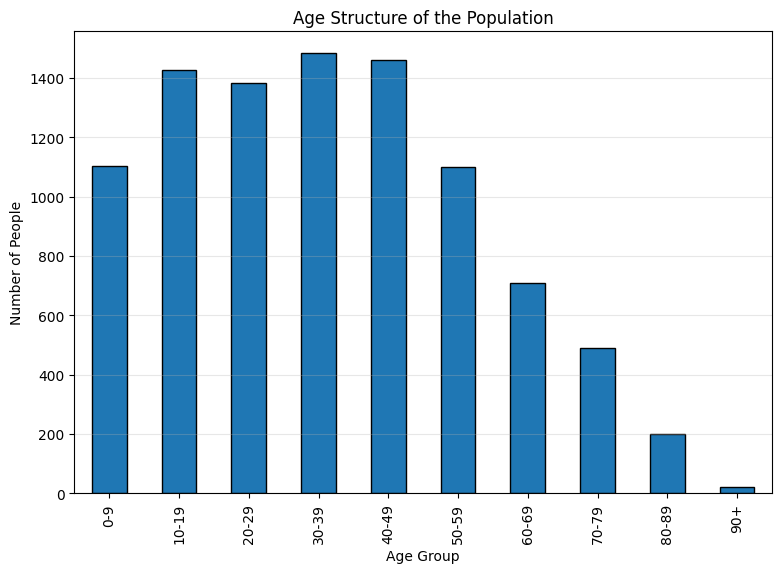

AgeGroup
0-9      1104
10-19    1428
20-29    1385
30-39    1483
40-49    1462
50-59    1101
60-69     711
70-79     489
80-89     201
90+        23
Name: count, dtype: int64


In [25]:
bins = [0,10,20,30,40,50,60,70,80,90,120]
labels = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

age_counts = df["AgeGroup"].value_counts().sort_index()

plt.figure(figsize=(9,6))
age_counts.plot(kind="bar", edgecolor="black")
plt.title("Age Structure of the Population")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.grid(axis='y', alpha=0.3)
plt.savefig("age_structure_population.png",bbox_inches="tight")
plt.show()

print(age_counts)

### Age Structure by Gender
An age pyramid helps compare male vs female distribution across age groups and identify demographic imbalances.

C:\Users\nandh\AppData\Local\Temp\ipykernel_19392\2952049225.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender = df.groupby(["AgeGroup", "Gender"]).size().unstack(fill_value=0)


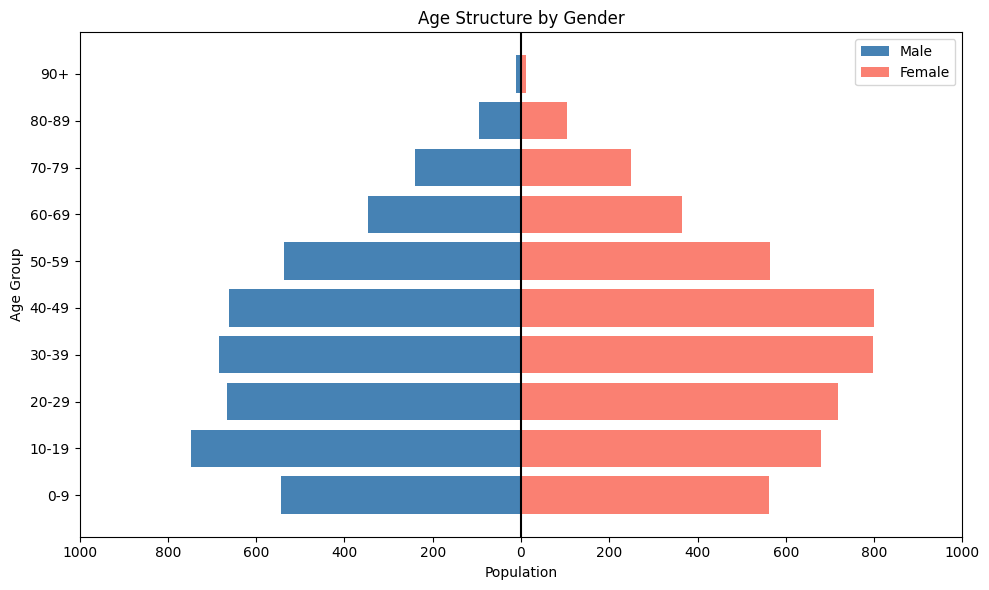

In [26]:

# Create 10-year age groups
bins = [0,10,20,30,40,50,60,70,80,90,120]
labels = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Count males and females in each age group
age_gender = df.groupby(["AgeGroup", "Gender"]).size().unstack(fill_value=0)

# Make males negative so they appear on the left
age_gender["Male"] = -age_gender["Male"]

# Plot
plt.figure(figsize=(10,6))
plt.barh(age_gender.index, age_gender["Male"], color="steelblue", label="Male")
plt.barh(age_gender.index, age_gender["Female"], color="salmon", label="Female")

plt.title("Age Structure by Gender")
plt.xlabel("Population")
plt.ylabel("Age Group")
plt.axvline(0, color="black")

# Convert negative x-axis ticks to positive labels
xticks = plt.xticks()[0]
plt.xticks(xticks, [abs(int(x)) for x in xticks])

plt.legend()
plt.tight_layout()
plt.savefig("age_structure_gender.png",bbox_inches="tight")
plt.show()


### Employment Status
We summarise employment categories to understand workforce composition (e.g., employed, unemployed, student, retired).

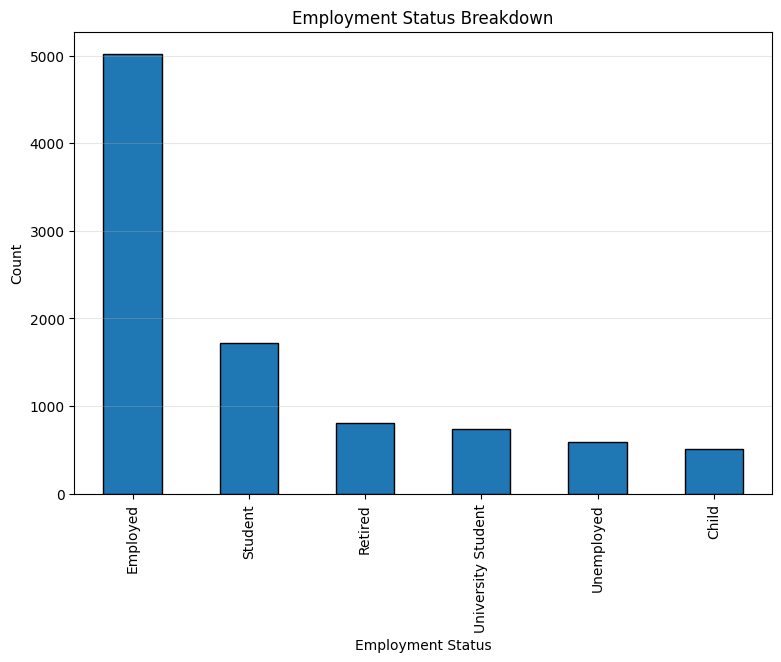

Total students: 2462
University students: 744


In [27]:
plt.figure(figsize=(9,6))
df["Employment Status"].value_counts().plot(kind="bar", edgecolor='black')
plt.title("Employment Status Breakdown")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.savefig("Employment_Status.png",bbox_inches="tight")
plt.show()

# Counting the number students
total_students = df[df["Employment Status"].isin(["Student", "University Student"])]
uni_students = df[df["Employment Status"] == "University Student"]

print("Total students:", len(total_students))
print("University students:", len(uni_students))


### Employment Status Across Age Groups
Cross-tabulating employment by age group helps identify which ages are most affected by unemployment or which groups dominate the workforce.

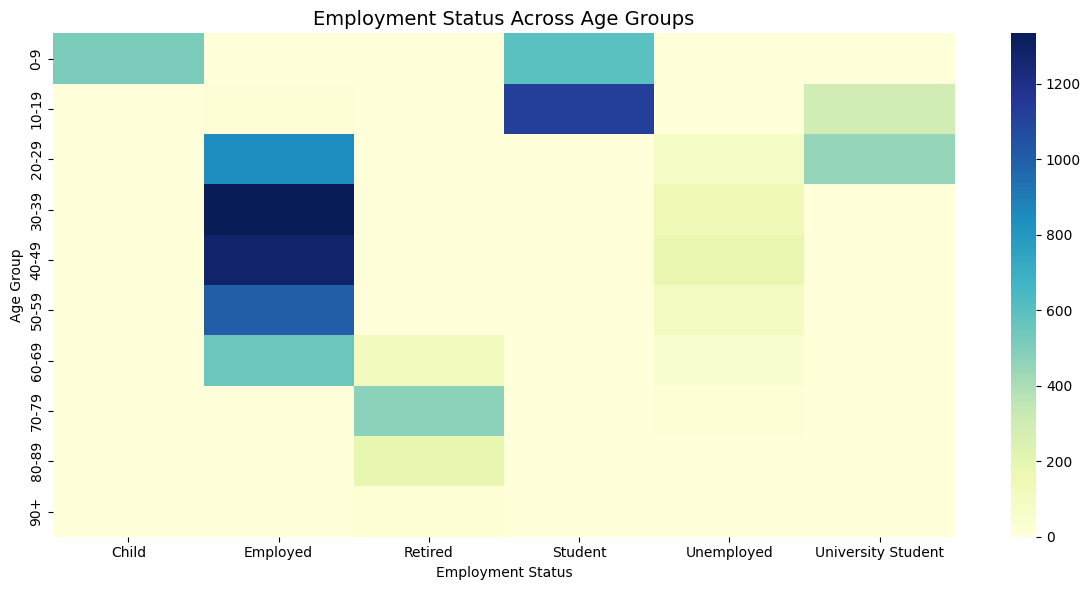

In [28]:
age_employment = pd.crosstab(df["AgeGroup"], df["Employment Status"])

plt.figure(figsize=(12,6))
sns.heatmap(
    age_employment,
    cmap="YlGnBu",
    annot=False
)

plt.title("Employment Status Across Age Groups", fontsize=14)
plt.xlabel("Employment Status")
plt.ylabel("Age Group")
plt.tight_layout()
plt.savefig("Employment_Status_age.png",bbox_inches="tight")
plt.show()


### Household Occupancy
Household size provides evidence for housing needs (e.g., demand for family housing vs smaller units).

C:\Users\nandh\AppData\Local\Temp\ipykernel_19392\544085478.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


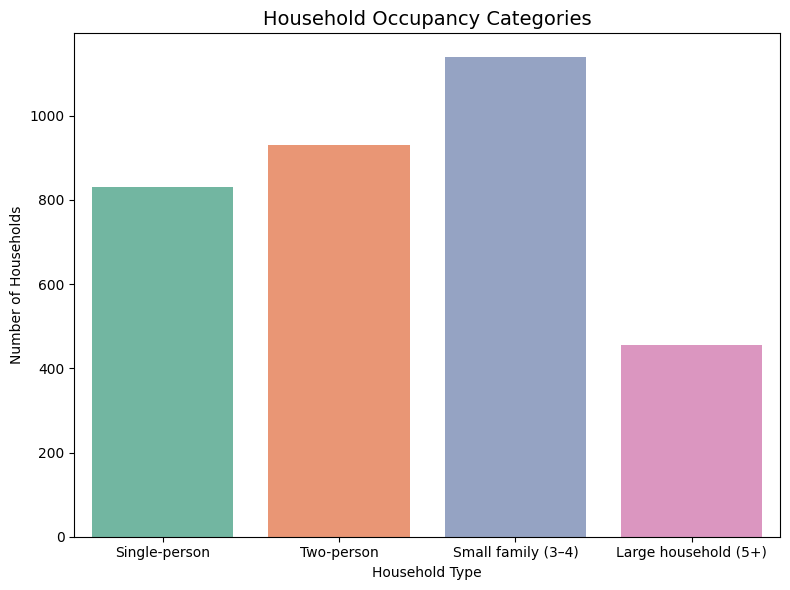

In [29]:
# Categorise household sizes
household_sizes = df.groupby("Household")["Age"].count()
def household_category(size):
    if size == 1:
        return "Single-person"
    elif size == 2:
        return "Two-person"
    elif size <= 4:
        return "Small family (3–4)"
    else:
        return "Large household (5+)"

household_categories = household_sizes.apply(household_category)

plt.figure(figsize=(8,6))
sns.countplot(
    x=household_categories,
    order=["Single-person", "Two-person", "Small family (3–4)", "Large household (5+)"],palette="Set2"
)

plt.title("Household Occupancy Categories", fontsize=14)
plt.xlabel("Household Type")
plt.ylabel("Number of Households")
plt.tight_layout()
plt.savefig("Household_Occupancy.png",bbox_inches="tight")
plt.show()


### Marital Status
Marital status can influence housing demand and household structure (e.g., single vs family households).

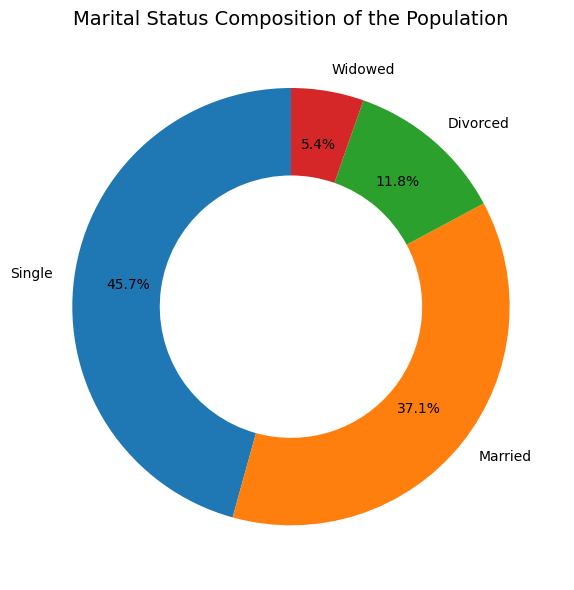

In [30]:
marital_clean = df[df["Marital Status"] != "Unknown"]

marital_counts = marital_clean["Marital Status"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    marital_counts,
    labels=marital_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.75,
    wedgeprops=dict(width=0.4)
)

plt.title("Marital Status Composition of the Population", fontsize=14)
plt.tight_layout()
plt.savefig("Marital_status.png",bbox_inches="tight")
plt.show()


### Religion Distribution
We examine religious affiliation distribution to understand whether there is evidence for demand for additional religious facilities.

C:\Users\nandh\AppData\Local\Temp\ipykernel_19392\3084637357.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


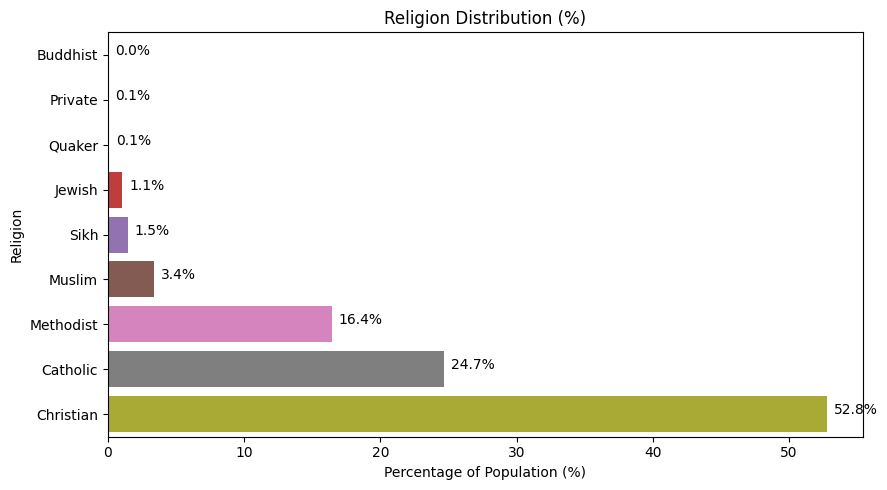

In [31]:
religion_clean = df[df["Religion"] != "Unknown"]

religion_percent = (
    religion_clean["Religion"]
    .value_counts(normalize=True)
    .mul(100)
    .sort_values()
)

plt.figure(figsize=(9,5))
sns.barplot(
    x=religion_percent.values,
    y=religion_percent.index,
    palette="tab10"
)

plt.xlabel("Percentage of Population (%)")
plt.ylabel("Religion")
plt.title("Religion Distribution (%)")

# Add labels
for i, v in enumerate(religion_percent.values):
   plt.text(v + 0.5, i, f"{v:.1f}%")

plt.tight_layout()
plt.savefig("religion.png",bbox_inches="tight")
plt.show()


### Infirmity
We summarise recorded infirmities to gauge potential need for healthcare investment and community support services.

In [35]:
# Counting infirmities
infirmity_counts = df["Infirmity"].value_counts()

# Creating summary table
infirmity_table = infirmity_counts.to_frame(name="Count")
infirmity_table["Frequency (%)"] = (
    infirmity_table["Count"] / infirmity_table["Count"].sum() * 100
)

# Round percentages
infirmity_table["Frequency (%)"] = infirmity_table["Frequency (%)"].round(1)

infirmity_table

infirmity_table.style.format({"Frequency (%)": "{:.1f}%"}) \
    .bar(subset=["Frequency (%)"], color="#4C72B0")




,Count,Frequency (%)
Infirmity,,
Not Recorded,9326,99.4%
Blind,19,0.2%
Physical Disability,18,0.2%
Deaf,10,0.1%
Mental Disability,8,0.1%
Unknown Infection,6,0.1%


## Conclusion & Recommendation (Summary)

**Key findings (fill in after reviewing your outputs):**
- **Population structure:** (e.g., mostly working-age / ageing / youthful)
- **Employment:** (e.g., unemployment concentrated in certain age groups)
- **Households:** (e.g., average occupancy suggests demand for ...)
- **Other insights:** (religion/infirmity trends as relevant)

**Recommendation (example template):**  
Based on the age distribution, employment patterns, and household occupancy, the evidence suggests prioritising **[your chosen development]** on the available land and investing in **[your chosen investment option]**.  
This recommendation is supported by the trends shown in the plots and summary tables above.